In [1]:
import pandas as pd
df = pd.read_csv("Trazas HP.csv", delimiter=';')

In [ ]:
level_filtered = df[df['Value.EventType'].str.contains('InicioNivelEvent') | df['Value.EventType'].str.contains('MuerteJugadorEvent')]

from collections import defaultdict
# Guarda los niveles que se han completado por run y por persona
lvl_played_run = defaultdict(list)

run = 0
current_sid = ''
for ind in level_filtered.index:
    a = str(level_filtered['SessionID'][ind])
    if a not in current_sid:
        run = 0
        current_sid = a
        
    # La unica manera de acabar la run es muriendo, asi se pasa a la siguiente
    if 'InicioNivelEvent' in level_filtered['Value.EventType'][ind]:
        # Cuando esta vacio o se aumenta de run, se hace un append a la lista
        if not lvl_played_run[a]:
            lvl_played_run[a].append(1)
        elif len(lvl_played_run[a]) is run:
            lvl_played_run[a].append(1)
        else:
            lvl_played_run[a][run] += 1
    else:
        run += 1

In [12]:
df_forms = pd.read_csv("FormsCompleto.csv", delimiter=';')
skills = df_forms[['Name','Value.Skill']].dropna()

skillsIDs = defaultdict(list)
for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Skill'][ind])

[13, 18, 46, 7, 7, 6, 12, 17, 5, 7, 6, 10, 13, 7, 8, 7, 9, 6, 7, 15, 15, 1, 4, 15, 10, 17, 1, 1, 1, 2, 2, 2, 2, 9, 10, 5, 12, 10, 20, 8, 8, 8, 2, 6, 6, 9, 3, 6, 6, 14, 8, 6, 10, 13, 15, 9, 10, 9, 1, 4, 2, 2, 1, 5, 1, 1, 11]
[4, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 4, 2, 5, 4, 4, 5, 5, 4, 3, 2, 3, 2, 4, 3, 1, 3, 4, 4, 3, 3, 4, 4, 2, 3, 2, 2, 3, 3, 3, 4, 5, 4, 4, 5, 4, 4, 4, 2, 3, 4, 3, 3, 4, 4, 4, 2, 4, 4, 5, 3, 3, 3, 1, 4, 2]


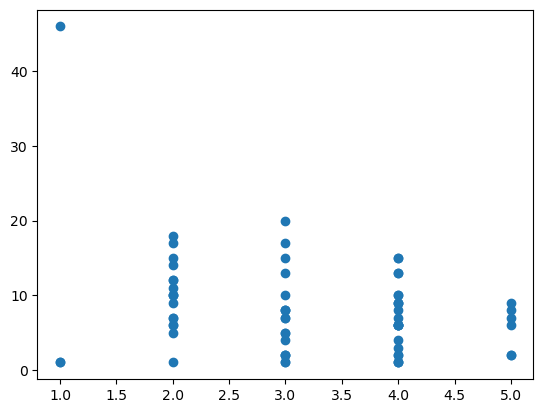

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for ind in skillsIDs:
    for i in range(0,len(skillsIDs[ind])):
        if skillsIDs[ind] and lvl_played_run[str(ind)]:
            x.append(skillsIDs[ind][i])
            y.append(lvl_played_run[str(ind)][i])
        
print(y)
print(x)
plt.scatter(x,y)
plt.show()